# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
#FINAL CODE FOR CITIES PULL

# # List for holding lat_lngs and cities
# lat_lngs = []
# cities = []

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# len(cities)

629

In [3]:
#CODE FOR TESTING

# List for holding lat_lngs and cities
lat_lngs = []
samplecities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=75)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=75)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in samplecities:
        samplecities.append(city)

# Print the city count to confirm sufficient count
len(samplecities)

62

In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

lat = []
lng = []
temp_max = []
humidity = []
clouds = []
windspeed = []
country = []
date = []
cities = []

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beggining Data Retrieval")
print("------------------------")

recordcount = 0
setcount = 1

for city in samplecities:
        
    # Try to grab the data for each city in sample set if they are available in the Open Weather API
    try:     
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities.append(response['name'])
        if recordcount < 50:
            recordcount = recordcount + 1
        else:
            setcount = setcount + 1
            recordcount = 0
        time.sleep(1.01)
        print(f"Processing Record of {recordcount} Set {setcount} | {city}")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        # Append null values
        print("City not found. Skipping...")
        pass

Beggining Data Retrieval
------------------------
Processing Record of 1 Set 1 | hermanus
Processing Record of 2 Set 1 | kununurra
Processing Record of 3 Set 1 | punta arenas
Processing Record of 4 Set 1 | rikitea
City not found. Skipping...
Processing Record of 5 Set 1 | yellowknife
Processing Record of 6 Set 1 | saint-philippe
Processing Record of 7 Set 1 | yulara
Processing Record of 8 Set 1 | broken hill
Processing Record of 9 Set 1 | upernavik
Processing Record of 10 Set 1 | karratha
Processing Record of 11 Set 1 | te anau
Processing Record of 12 Set 1 | fare
Processing Record of 13 Set 1 | chokurdakh
Processing Record of 14 Set 1 | hasaki
Processing Record of 15 Set 1 | ushuaia
Processing Record of 16 Set 1 | cochrane
Processing Record of 17 Set 1 | bend
City not found. Skipping...
Processing Record of 18 Set 1 | melfi
Processing Record of 19 Set 1 | aklavik
Processing Record of 20 Set 1 | lebu
Processing Record of 21 Set 1 | chapais
Processing Record of 22 Set 1 | cherskiy
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
cities_dict = pd.DataFrame({
    'City': cities,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp_max,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': windspeed,
    'Country': country,
    'Date': date
})

# Convert to DataFrame
cities_data = pd.DataFrame(cities_dict)

cities_data.to_csv('output_data/cities.csv', encoding="utf-8", index=False)
cities_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,84.00,51,6,1.99,ZA,1616686995
1,Kununurra,-15.7667,128.7333,78.80,100,100,3.44,AU,1616687399
2,Punta Arenas,-53.1500,-70.9167,50.00,87,90,20.71,CL,1616687188
3,Rikitea,-23.1203,-134.9692,79.77,70,29,18.19,PF,1616687187
4,Yellowknife,62.4560,-114.3525,-4.00,70,75,4.61,CA,1616687253


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
cities_data.describe().round(2)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,59.00,59.00,59.00,59.00,59.00,59.00,5.900000e+01
mean,8.95,7.49,54.06,74.85,60.44,7.83,1.616687e+09
std,40.12,113.19,30.98,17.08,35.63,5.11,2.423000e+02
min,-54.80,-175.20,-28.93,21.00,0.00,1.01,1.616687e+09
25%,-23.04,-78.68,43.70,64.00,31.50,3.99,1.616687e+09
50%,-0.74,12.03,60.80,78.00,75.00,6.91,1.616687e+09
75%,49.73,124.92,78.80,87.50,90.00,10.06,1.616688e+09
max,72.79,168.86,93.63,100.00,100.00,20.92,1.616688e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

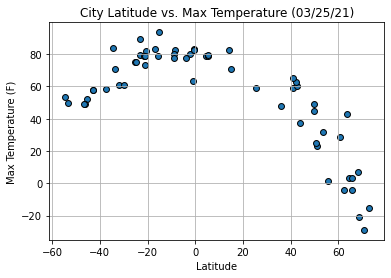

In [34]:
plt.scatter(cities_data['Lat'], cities_data['Max Temp'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Max Temperature (03/25/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

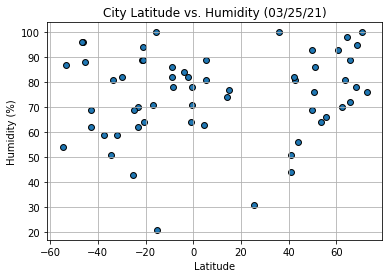

In [35]:
plt.scatter(cities_data['Lat'], cities_data['Humidity'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Humidity (03/25/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

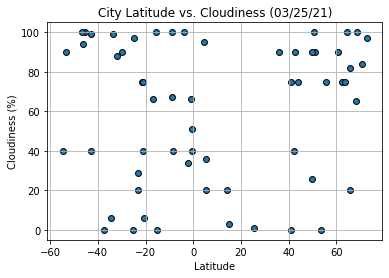

In [30]:
plt.scatter(cities_data['Lat'], cities_data['Cloudiness'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Cloudiness (03/25/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

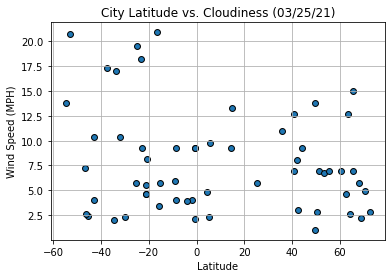

In [29]:
plt.scatter(cities_data['Lat'], cities_data['Wind Speed'], marker = "o", s=35, edgecolors= 'black')

#Create the lables
plt.title("City Latitude vs. Cloudiness (03/25/21)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

#save image
plt.savefig("output_data/Latitude_vs_Windspeed.png")
plt.show()

## Linear Regression

In [37]:
nh_data= cities_data.loc[cities_data['Lat']>=0]
sh_data= cities_data.loc[cities_data['Lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8828081877150505


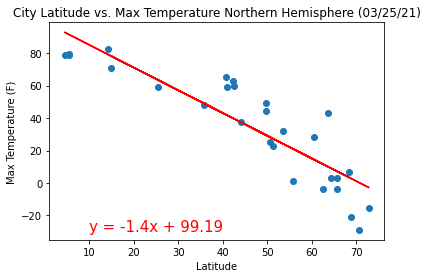

In [68]:
x_axis = nh_data['Lat']
y_axis = nh_data['Max Temp']

#used stats library to calculate the value of each
(slope, intercept, rvalue, p, std_err) = linregress(x_axis, y_axis)

# Create equation of line to calculate predicted volume at weight
fit = slope * x_axis + intercept

#print correlation between Latitude & Max Temp
# rvalue = round(rvalue,2)

print(f"The r-value is: {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color='r')
plt.annotate(('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))), (10, -30), fontsize=15, color='r')

plt.title("City Latitude vs. Max Temperature Northern Hemisphere (03/25/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#save image
plt.savefig("output_data/NH_Latitude_vs_MaxTemp.png")
plt.show()

The r-value is: 0.46937863826630627


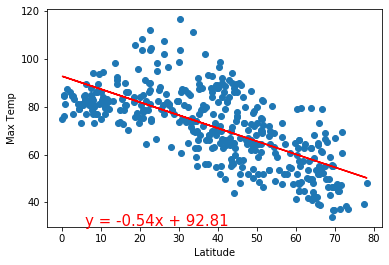

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


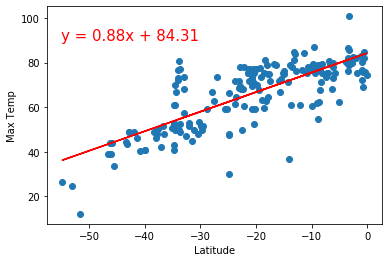

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


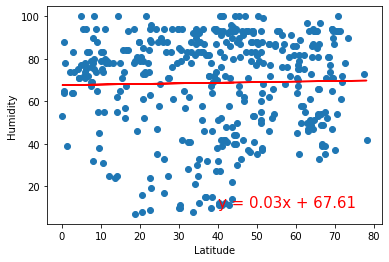

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


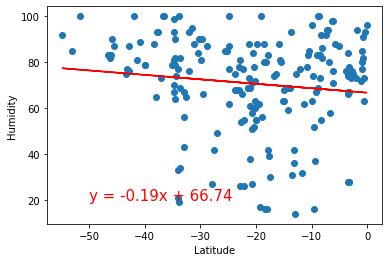

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


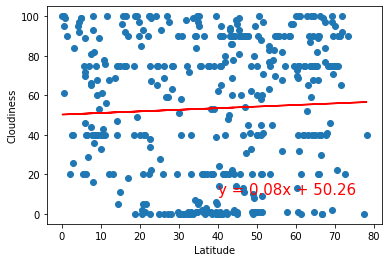

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


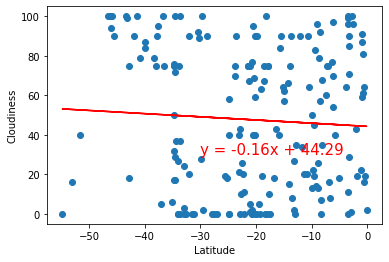

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


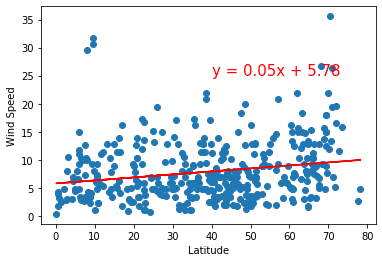

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


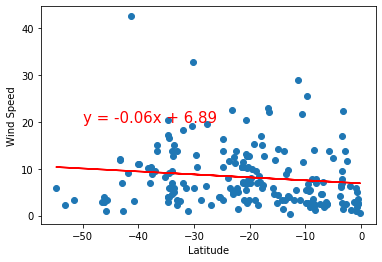